In [519]:
%matplotlib inline

In [520]:
import numpy as np
import seaborn as sns
import matplotlib as plt
import pandas as pd
from pandas import DataFrame, Series

In [521]:
complaints = pd.read_csv('complaints_dec_2014.csv')
complaints.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN
1,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN
2,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN
3,1177164,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN
4,1177163,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN


Product
Bank account or service    1136
Consumer loan               578
Credit card                1100
Credit reporting           2113
Debt collection            2942
Money transfers             107
Mortgage                   3002
Other financial service      14
Payday loan                 141
Prepaid card                 70
dtype: int64

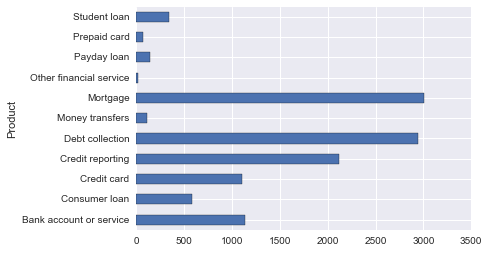

In [548]:
by_product = complaints.groupby('Product').size()
by_product.plot.barh()
by_product.head(10)

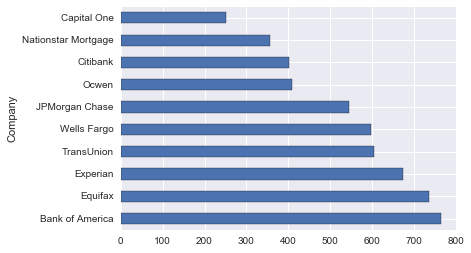

In [523]:
by_company = complaints.groupby('Company').size()
top_10_company_complaints = by_company.sort_values(ascending=False).head(10)
top_10_company_complaints.plot.barh()

Company response
Closed                              239
Closed with explanation            8185
Closed with monetary relief         643
Closed with non-monetary relief    1253
In progress                        1056
Untimely response                   167
dtype: int64

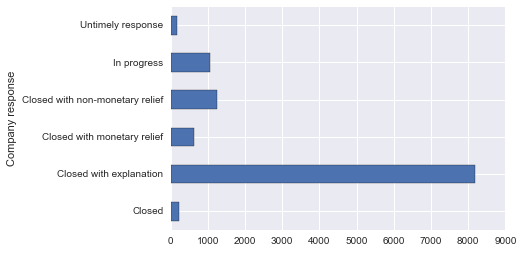

In [524]:
by_response = complaints.groupby('Company response').size()
by_response.plot.barh()
by_response.head(10)

In [542]:
date_complaints = complaints.copy()
consumer_complaints_by_date = date_complaints['Date sent to company']

In [549]:
date_complaints.index = pd.to_datetime(consumer_complaints_by_date, format='%m/%d/%Y')
date_complaints['weekday'] = date_complaints.index.to_series().map(lambda day: day.weekday())
day_of_week = date_complaints.groupby('weekday').size()
day_of_week.head(10)

weekday
0    2609
1    2450
2    2540
3    1449
4    1742
5     429
6     324
dtype: int64

In [552]:
date_complaints = date_complaints.rename(columns={'Date sent to company': 'date_sent_to_company'})
date_complaints.head(10)


,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,date_sent_to_company,Company,Company response,Timely response?,Consumer disputed?,weekday
Date sent to company,,,,,,,,,,,,,,,
2014-12-31,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN,2
2014-12-31,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN,2
2014-12-31,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN,2
2014-12-31,1177164,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN,2
2014-12-31,1177163,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN,2
2014-12-31,1177162,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Credit Systems International, Inc.",Closed with explanation,Yes,NaN,2
2015-01-07,1177154,Credit card,NaN,Billing disputes,NaN,GA,31322.0,Web,12/31/2014,01/07/2015,Amex,Closed with explanation,Yes,NaN,2
2015-01-07,1177143,Debt collection,Payday loan,Taking/threatening an illegal action,Threatened arrest/jail if do not pay,AZ,85023.0,Web,12/31/2014,01/07/2015,Speedy Cash Holdings,Closed,Yes,NaN,2
2014-12-31,1177140,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77045.0,Web,12/31/2014,12/31/2014,"Afni, Inc.",Closed with explanation,Yes,NaN,2


In [553]:
date_complaints.consumer_complaints_by_date.unique()

AttributeError: 'DataFrame' object has no attribute 'consumer_complaints_by_date'

weekday
0    2609
1    2450
2    2540
3    1449
4    1742
5     429
6     324
dtype: int64

SyntaxError: invalid syntax (<ipython-input-532-c85a1b45f693>, line 1)